# 04 - Decision Tree

The model that will be analyzed this time is Decision Trees.

There are some parameters that influentiate the model, therefore the tests involve changing these parameters to see which returns the best result. The values will be:

* The minimum number of samples required to be at a leaf node (in percentage): [.05, .025, .01, .0075, .005, .0025, .001]
* The maximum depth of the tree: [5, 10, 25, 50]
* The function to measure the quality of a split: ['entropy', 'gini']

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
import itertools
from utils import modelAnalyzesFunctions as analyzes

In [3]:
data: pd.DataFrame = pd.read_csv('../datasets/covtype_data_preparation.csv', sep=',', decimal='.')
copy_data = data.copy()
y: np.ndarray = copy_data.pop('Cover_Type').values
X: np.ndarray = copy_data.values
labels = pd.unique(y)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
0,0.546773,0.200000,0.454545,0.047960,0.272610,0.367290,0.937008,0.665354,0.161417,0.308518,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.637819,0.891667,0.090909,0.064424,0.223514,0.105381,0.803150,0.921260,0.665354,0.158929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.716858,0.163889,0.287879,0.125268,0.232558,0.593790,0.905512,0.771654,0.354331,0.500209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.549775,0.133333,0.106061,0.021475,0.228682,0.437544,0.877953,0.885827,0.543307,0.157814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.699850,0.519444,0.121212,0.336435,0.295866,0.360264,0.870079,0.968504,0.625984,0.191552,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Figure size 432x288 with 0 Axes>

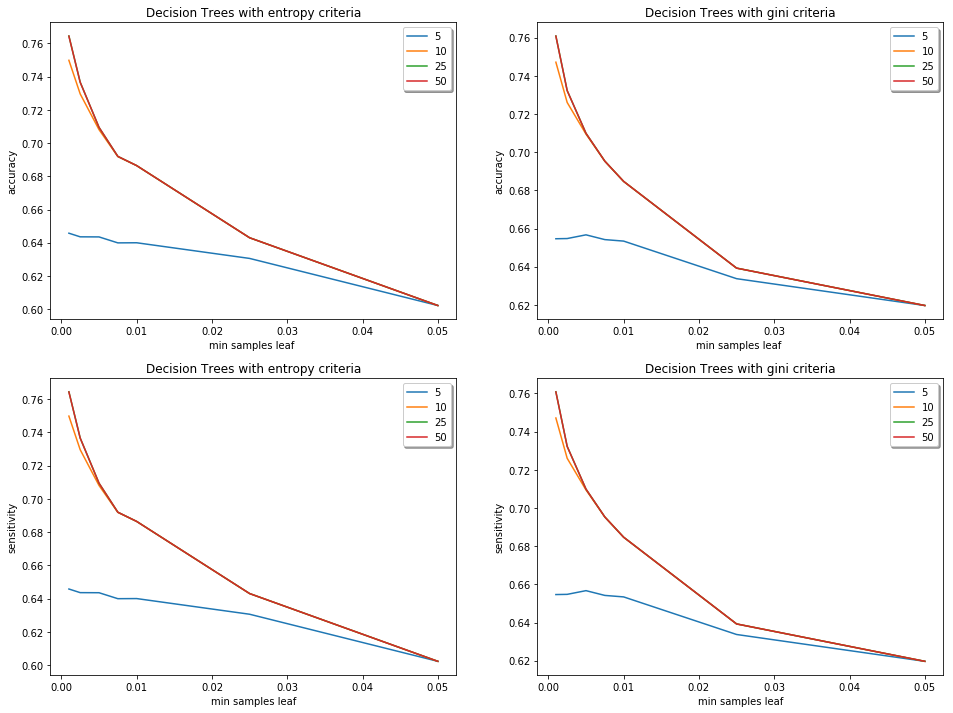

In [4]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

accuracy, sensitivity, decision_trees = analyzes.decision_tree_analyzes(X, y, min_samples_leaf, max_depths, criteria, rskf, average='micro')

The lower the min samples leaf, the better accuracy and sensitivity, which means that it's using less samples per leaf, resulting in learning more details. It's possible that the real distribution behave like that, but we need to pay attention about overfitting.  
In the case of min_samples_leaf = 0.001, the minimum will be (number of samples) * 0,001 equals to around 20.

Another thing is that after depth of 25, there is basically no gain, therefore the tree's lines are overlapping on the graph.

In [5]:
diff = 0
diff += (accuracy['entropy'][25] != accuracy['entropy'][50])
diff += (sensitivity['entropy'][25] != sensitivity['entropy'][50])
diff += (accuracy['gini'][25] != accuracy['gini'][50])
diff += (sensitivity['gini'][25] != sensitivity['gini'][50])
print(diff)
print((accuracy['entropy'][25] - accuracy['entropy'][50]))

[0 0 0 0 0 4 4]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.46572399e-05 1.21224559e-04]


In [6]:
for c in criteria:
    max_acc, max_sens = analyzes.get_max_accuracy_sensitivity_data(accuracy, sensitivity, max_depths, min_samples_leaf, c)
    
    print()
    print(c, '- max accuracy:')
    print('Accuracy:', max_acc['acc'])
    print('Sensitivity:', max_acc['sens'])
    print('max_depth:', max_acc['max_depth'])
    print('min_samples_leaf:', max_acc['min_sample_leaf'])
    print()
    print(c, '- max sensitivity:')
    print('Accuracy:', max_sens['acc'])
    print('Sensitivity:', max_sens['sens'])
    print('max_depth:', max_sens['max_depth'])
    print('min_samples_leaf:', max_sens['min_sample_leaf'])


entropy - max accuracy:
Accuracy: 0.7644857916430988
Sensitivity: 0.7644857916430988
max_depth: 25
min_samples_leaf: 0.001

entropy - max sensitivity:
Accuracy: 0.7644857916430988
Sensitivity: 0.7644857916430988
max_depth: 25
min_samples_leaf: 0.001

gini - max accuracy:
Accuracy: 0.7608963423173388
Sensitivity: 0.7608963423173388
max_depth: 25
min_samples_leaf: 0.001

gini - max sensitivity:
Accuracy: 0.7608963423173388
Sensitivity: 0.7608963423173388
max_depth: 25
min_samples_leaf: 0.001


To ilustrate the decision tree, one example will be plotted below.

In [7]:
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(decision_trees['entropy'][25][0], out_file='dtree.dot', filled=True, rounded=True, special_characters=True)  
# # Convert to png
# from subprocess import call
# call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

# plt.figure(figsize = (35, 45))
# plt.imshow(plt.imread('dtree.png'))
# plt.axis('off')
# plt.show()